In [1]:
# Test migration history reconstruction on simulated data

import sys
import os

repo_dir = "/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/"
os.chdir(repo_dir)
from src.lib import vertex_labeling

from src.util import machina_data_extraction_util as mach_util
from src.util import vertex_labeling_util as vert_util
import matplotlib
import torch

SANBORN_DATA_DIR = os.path.join(repo_dir, 'src/data/sanborn_melanoma_2015')


CUDA GPU: False
CUDA GPU: False
CUDA GPU: False


In [8]:

def find_labeling(all_mut_trees_fn, ref_var_fn, custom_colors):    
    ref_matrix, var_matrix, unique_sites, cluster_label_to_idx = mach_util.get_ref_var_matrices_from_real_data(ref_var_fn)
    print(ref_matrix)
    print(var_matrix)
    data = mach_util.get_adj_matrices_from_all_mutation_trees(all_mut_trees_fn, cluster_label_to_idx)
    print("num trees:", len(data))
    
    for adj_matrix, pruned_cluster_label_to_idx in data:
        T = torch.tensor(adj_matrix, dtype = torch.float32)
        B = vert_util.get_mutation_matrix_tensor(T)

        idx_to_label = {v:str(v) for k,v in pruned_cluster_label_to_idx.items()}

        print(unique_sites)   
        primary_idx = unique_sites.index('primary')
        r = torch.nn.functional.one_hot(torch.tensor([primary_idx]), num_classes=len(unique_sites)).T
        weights = vertex_labeling.Weights(data_fit=1.0, mig=4.0, comig=2.0, seed_site=1.0, reg=1.0, gen_dist=0.0)
        vertex_labeling.gumbel_softmax_optimization(T, ref_matrix, var_matrix, B, ordered_sites=unique_sites, 
                                                    weights=weights, p=r, node_idx_to_label=idx_to_label, 
                                                    max_iter=150, batch_size=64,
                                                    custom_colors=custom_colors, primary="primary", show_top_trees=False)


        

tensor([[24566.,   106.,  1081.,   397.],
        [44579.,   211.,  1272.,   524.],
        [35250.,   131.,  1112.,   407.],
        [21362.,   164.,   568.,   379.]])
tensor([[14113.,    67.,     0.,     0.],
        [ 4304.,     0.,   106.,     0.],
        [ 8403.,    44.,     0.,    53.],
        [ 9294.,     0.,   249.,     0.]])
num trees: 1
['primary', 'parotid_gland', 'locoregional_1', 'locoregional_2']


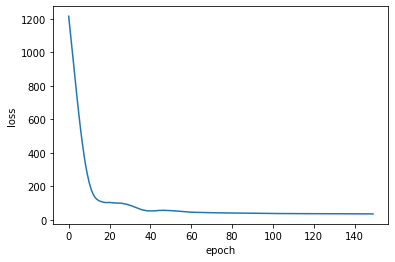

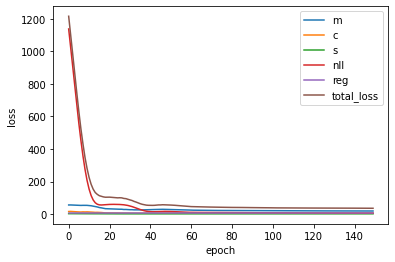

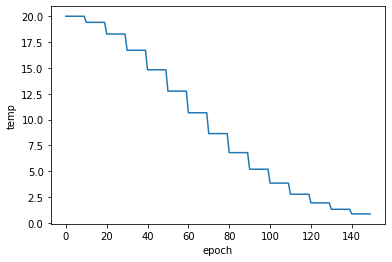

16:40:52 DEBUG

U > 0.05

16:40:52 DEBUG
                norm     0     1     2     3
primary        0.270 0.000 0.677 0.000 0.000
parotid_gland  0.822 0.000 0.000 0.102 0.000
locoregional_1 0.614 0.000 0.113 0.000 0.209
locoregional_2 0.393 0.000 0.000 0.586 0.000
16:40:52 DEBUG

F_hat
16:40:52 DEBUG
tensor([[0.9469, 0.6772, 0.6772, 0.0000, 0.0000],
        [0.9246, 0.1023, 0.0000, 0.1023, 0.0000],
        [0.9364, 0.3222, 0.3222, 0.0000, 0.2094],
        [0.9788, 0.5858, 0.0000, 0.5858, 0.0000]])
16:40:52 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


****************************** BEST TREE ******************************

Migration number: 4.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 4.879
Reg: 4.0
Loss: 31.879


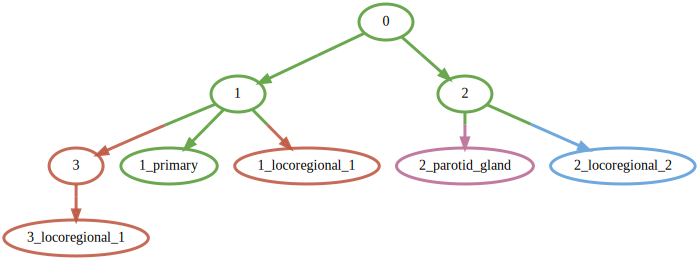

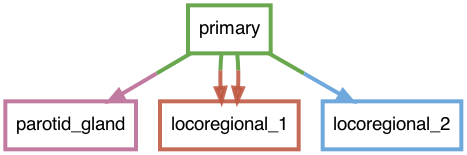

Time elapsed: 13.654032


In [9]:
# Patient A
patient = "A"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'red',  'purple', 'darkorange',]]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)



tensor([[232357.,   3880.,   4300.,   1260.,   3238.],
        [166433.,   3706.,   4399.,    756.,   3257.],
        [248537.,   3652.,   4987.,   1634.,   3156.]])
tensor([[7.0237e+04, 6.5000e+01, 6.4400e+02, 0.0000e+00, 2.4000e+01],
        [1.1165e+05, 0.0000e+00, 0.0000e+00, 5.0200e+02, 0.0000e+00],
        [7.6776e+04, 7.9500e+02, 0.0000e+00, 0.0000e+00, 6.5700e+02]])
num trees: 1
['primary', 'locoregional_1', 'locoregional_2']


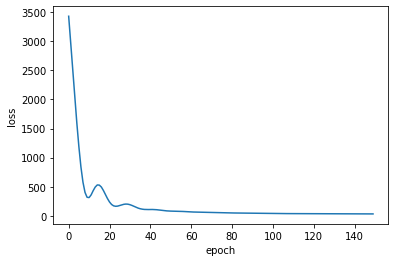

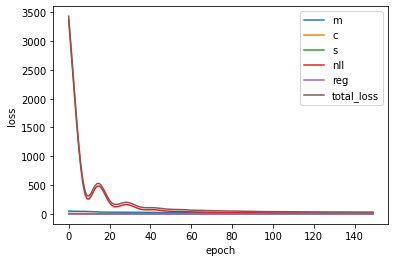

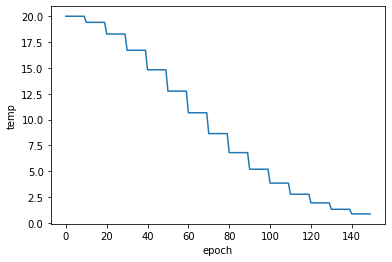

16:41:06 DEBUG

U > 0.05

16:41:06 DEBUG
                norm     0     1     2     3     4
primary        0.536 0.070 0.000 0.276 0.061 0.000
locoregional_1 0.197 0.000 0.000 0.000 0.775 0.000
locoregional_2 0.528 0.000 0.000 0.000 0.000 0.333
16:41:06 DEBUG

F_hat
16:41:06 DEBUG
tensor([[0.9429, 0.4068, 0.0000, 0.2758, 0.0611, 0.0000],
        [0.9721, 0.7753, 0.0000, 0.0000, 0.7753, 0.0000],
        [0.8612, 0.3331, 0.3331, 0.0000, 0.0000, 0.3331]])
16:41:06 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


****************************** BEST TREE ******************************

Migration number: 2.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 12.245
Reg: 3.000000238418579
Loss: 28.245


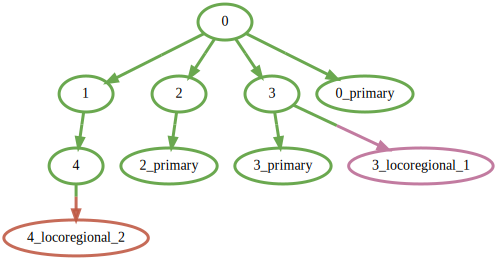

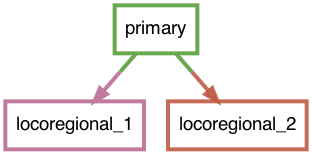

Time elapsed: 13.968757


In [10]:
# Patient C
patient = "C"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'purple', 'darkorange']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)



tensor([[2500.,   93.],
        [2446.,   72.],
        [1633.,   59.],
        [1699.,   45.]])
tensor([[ 792.,    0.],
        [ 993.,   44.],
        [1040.,   27.],
        [1280.,   33.]])
num trees: 1
['primary', 'lymph_node', 'locoregional_1', 'locoregional_2']


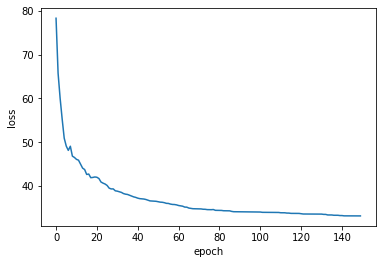

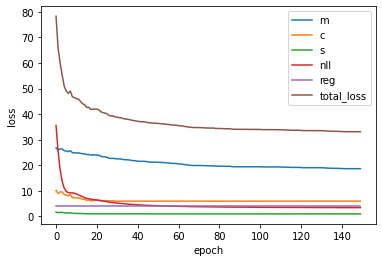

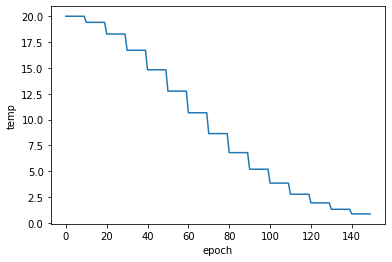

16:41:20 DEBUG

U > 0.05

16:41:20 DEBUG
                norm     0     1
primary        0.519 0.468 0.000
lymph_node     0.416 0.000 0.578
locoregional_1 0.222 0.151 0.627
locoregional_2 0.140 0.000 0.813
16:41:20 DEBUG

F_hat
16:41:20 DEBUG
tensor([[0.9871, 0.4684, 0.0000],
        [0.9943, 0.5780, 0.5780],
        [1.0000, 0.7781, 0.6267],
        [0.9521, 0.8125, 0.8125]])
16:41:20 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


****************************** BEST TREE ******************************

Migration number: 4.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 3.368
Reg: 4.0
Loss: 30.368


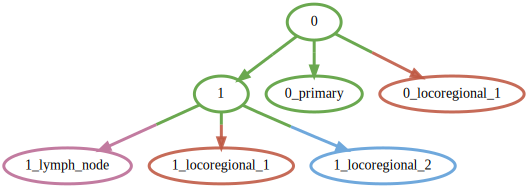

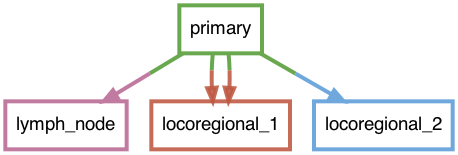

Time elapsed: 13.384374


In [11]:
# Patient D
patient = "D"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'royalblue', 'purple', 'darkorange', ]]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)


tensor([[ 405., 6259.,  830.,  554., 1823.,   56.,  669.,  664.],
        [ 283., 6938., 1625.,  373., 2186.,   88.,  978.,  890.],
        [ 301., 7570., 1808.,  405., 2468.,   66.,  568.,  986.],
        [ 268., 6399., 1321.,  350., 1367.,   91.,  938.,  822.],
        [ 229., 5991., 1567.,  294., 2072.,   82.,  738.,  484.]])
tensor([[6.0000e+00, 3.8910e+03, 2.9900e+02, 5.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [2.2300e+02, 5.5440e+03, 2.0000e+00, 3.1700e+02, 0.0000e+00, 1.0000e+00,
         1.7000e+01, 2.0000e+00],
        [2.3700e+02, 5.6950e+03, 0.0000e+00, 3.0300e+02, 0.0000e+00, 3.0000e+01,
         1.1000e+02, 1.0000e+00],
        [2.2300e+02, 4.8760e+03, 0.0000e+00, 2.8700e+02, 5.4900e+02, 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [2.2000e+02, 4.5750e+03, 0.0000e+00, 2.5100e+02, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 3.9100e+02]])
num trees: 1
['primary', 'locoregional_1', 'locoregional_2', 'lymph_node', 'locoregional_3']


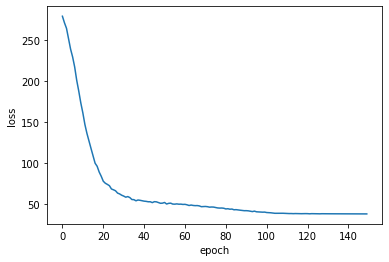

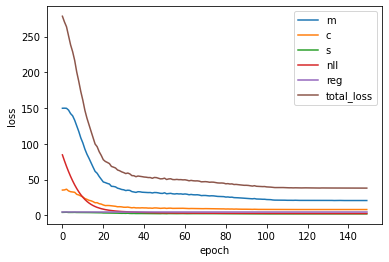

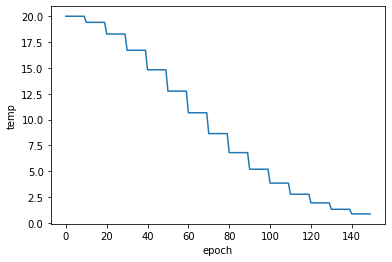

16:41:34 DEBUG

U > 0.05

16:41:34 DEBUG
                norm     0     1     2     3     4     5     6     7
primary        0.233 0.000 0.213 0.529 0.000 0.000 0.000 0.000 0.000
locoregional_1 0.110 0.000 0.000 0.000 0.812 0.000 0.000 0.000 0.000
locoregional_2 0.139 0.000 0.000 0.000 0.000 0.000 0.514 0.312 0.000
lymph_node     0.131 0.000 0.000 0.000 0.279 0.572 0.000 0.000 0.000
locoregional_3 0.125 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.865
16:41:34 DEBUG

F_hat
16:41:34 DEBUG
tensor([[0.9754, 0.0000, 0.7422, 0.5291, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.9217, 0.8119, 0.8119, 0.0000, 0.8119, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.9648, 0.8256, 0.8256, 0.0000, 0.8256, 0.0000, 0.5136, 0.3120, 0.0000],
        [0.9815, 0.8507, 0.8507, 0.0000, 0.8507, 0.5721, 0.0000, 0.0000, 0.0000],
        [0.9897, 0.8651, 0.8651, 0.0000, 0.8651, 0.0000, 0.0000, 0.0000, 0.8651]])
16:41:34 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


****************************** BEST TREE ******************************

Migration number: 5.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 2.38
Reg: 5.0
Loss: 37.38


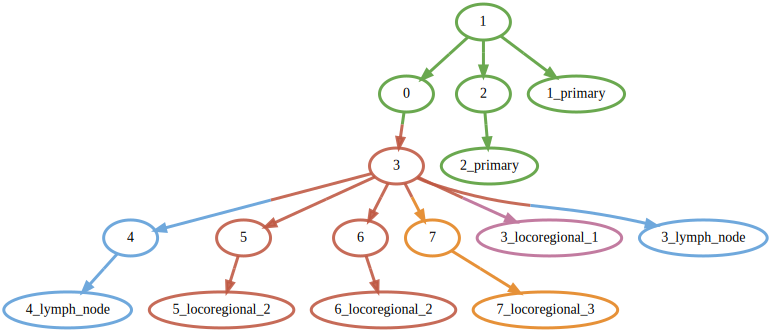

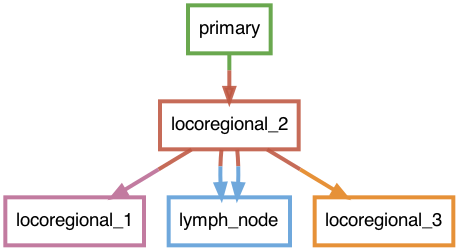

Time elapsed: 14.447566


In [12]:
# Patient E
patient = "E"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'purple', 'darkorange', 'royalblue', 'red', ]]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)

tensor([[3.6425e+05, 1.9400e+02, 2.4200e+02, 7.0200e+02, 4.9900e+02],
        [4.1847e+05, 2.7600e+02, 2.1300e+02, 8.4100e+02, 6.2600e+02],
        [3.8240e+05, 2.0100e+02, 1.3900e+02, 4.9800e+02, 2.9500e+02],
        [3.8090e+05, 2.4700e+02, 1.8100e+02, 5.9700e+02, 5.3300e+02]])
tensor([[1.6642e+05, 3.4000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.4787e+05, 0.0000e+00, 6.1000e+01, 0.0000e+00, 2.0000e+00],
        [8.3684e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.3000e+01],
        [1.3414e+05, 0.0000e+00, 5.7000e+01, 9.4000e+01, 0.0000e+00]])
num trees: 1
['primary', 'lymph_node', 'locoregional', 'distant']


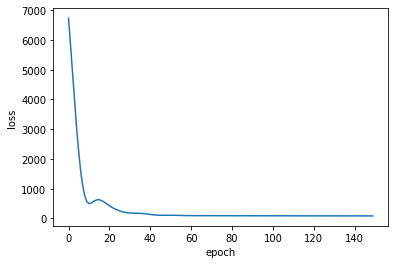

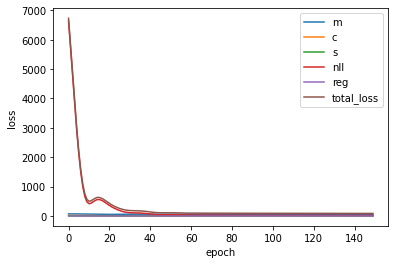

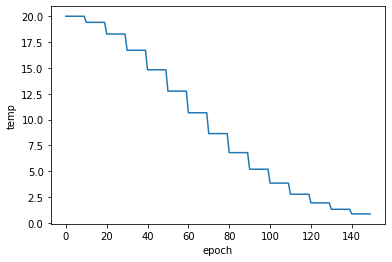

16:41:49 DEBUG

U > 0.05

16:41:49 DEBUG
              norm     0     1     2     3     4
primary      0.373 0.099 0.196 0.166 0.053 0.113
lymph_node   0.478 0.149 0.081 0.140 0.068 0.084
locoregional 0.641 0.000 0.000 0.067 0.091 0.107
distant      0.479 0.099 0.121 0.127 0.125 0.000
16:41:49 DEBUG

F_hat
16:41:49 DEBUG
tensor([[1.0000, 0.6273, 0.1962, 0.2185, 0.0528, 0.1133],
        [1.0000, 0.5223, 0.0812, 0.2080, 0.0680, 0.0839],
        [0.9059, 0.2649, 0.0000, 0.1583, 0.0911, 0.1066],
        [0.9502, 0.4715, 0.1210, 0.2517, 0.1247, 0.0000]])
16:41:49 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


****************************** BEST TREE ******************************

Migration number: 12.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 18.173
Reg: 3.999999523162842
Loss: 77.173


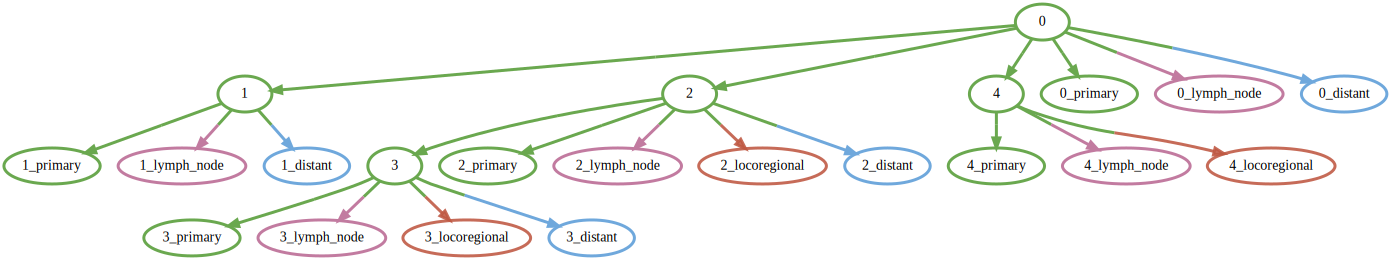

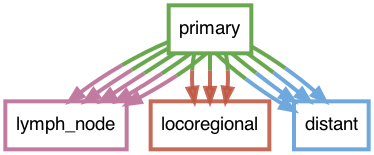

Time elapsed: 14.751076


In [13]:
# Patient F
patient = "F"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'royalblue', 'darkorange', 'hotpink']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)

